# Decision Trees

#### Instructions:
- Write modular code with relevant docstrings and comments for you to be able to use
functions you have implemented in future assignments.
- All theory questions and observations must be written in a markdown cell of your jupyter notebook.You can alsoadd necessary images in `imgs/` and then include it in markdown. Any other submission method for theoretical question won't be entertained.
- Start the assignment early, push your code regularly and enjoy learning!

### Question 1 Optimal DT from table
**[20 points]**\
We will use the dataset below to learn a decision tree which predicts if people pass machine
learning (Yes or No), based on their previous GPA (High, Medium, or Low) and whether or
not they studied. 

| GPA | Studied | Passed |
|:---:|:-------:|:------:|
|  L  |    F    |    F   |
|  L  |    T    |    T   |
|  M  |    F    |    F   |
|  M  |    T    |    T   |
|  H  |    F    |    T   |
|  H  |    T    |    T   |
    
 For this problem, you can write your answers using $log_2$
, but it may be helpful to note
that $log_2 3 ≈ 1.6$.

---
1. What is the entropy H(Passed)?
2. What is the entropy H(Passed | GPA)?
3. What is the entropy H(Passed | Studied)?
4. Draw the full decision tree that would be learned for this dataset. You do
not need to show any calculations.
---


$Entropy = \Sigma_{i}[-P_{i}log_{2}P_{i}]$ <br>

**1.**</br>
 $H(Passed) = [-P_{(passed=T)}log_{2}P_{(passed=T)}] + [-P_{(passed=F)}log_{2}P_{(passed=F)}]$</br>
$P_{(passed=T)} = 4/6 = 2/3$  </br>
$P_{(passed=F)} = 2/6 = 1/3$  
$H(Passed) = [-(2/3)log_{2}(2/3)] + [-(1/3)log_{2}(1/3)] = 2.8/3 ≈ 0.93 $

**2.** </br>
$H(Passed | GPA) = 1/3([-P_{(passed=T and GPA=L)}log_{2}P_{(passed=Tand GPA=L)}] + [-P_{(passed=Fand GPA=L)}log_{2}P_{(passed=Fand GPA=L)}]) + $
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;1/3([-P_{(passed=Tand GPA=M)}log_{2}P_{(passed=T and GPA=M)}] + [-P_{(passed=F and GPA=M)}log_{2}P_{(passed=F and GPA=M)}]) + $
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;1/3([-P_{(passed=Tand  GPA=H)}log_{2}P_{(passed=T and GPA=H)}] + [-P_{(passed=F and GPA=H)}log_{2}P_{(passed=F and GPA=H)}]) = 2 / 3 ≈ 0.67$

**3.** </br>
$H(Passed | Studied) = 1/2([-P_{(passed=T and Studied=F)}log_{2}P_{(passed=Tand Studied=F)}] + [-P_{(passed=Fand Studied=F)}log_{2}P_{(passed=Fand Studied=F)}]) + $
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;1/2([-P_{(passed=Tand Studied=T)}log_{2}P_{(passed=T and Studied=T)}] + [-P_{(passed=F and Studied=T)}log_{2}P_{(passed=F and Studied=T)}])=-1/3 + 1/2(log3)=0.4667 $




**4.** </br>
<img src="imgs/tree.jpg" height=1000>

### Question 2 DT loss functions
**[10 points]**
1. Explain Gini impurity and Entropy. 
2. What are the min and max values for both Gini impurity and Entropy
3. Plot the Gini impurity and Entropy for $p\in[0,1]$.
4. Multiply Gini impurity by a factor of 2 and overlay it over entropy.

1.  **Entropy**: It is a measure of uncertainty, used to get the best split in the descision tree.</br>
i<sub>$H$</sub>(N) = $\Sigma_{i}[-P_{i}log_{2}P_{i}]$</br></br>
**Variance Impurity**: i<sub>$\sigma$</sub>(N) = P(w<sub>1</sub>)P(w<sub>2</sub>)</br>
**Gini Impurity**    : By extending the variance impurity to many classes gives Gini impurity.</br>

     i<sub>G</sub>(N) = $\Sigma_{i \neq j}$ P(w<sub>i</sub>)P(w<sub>j</sub>) = 1 - $\Sigma_{i}$ P<sup>2</sup>(w<sub>i</sub>)

2. Minimum Gini Impurity: 0</br>
   Maximum Gini Impurity: 0.5</br>
   Minimum Entropy      : 0</br>
   Maximum Entropy      : 1 </br>

3,4.

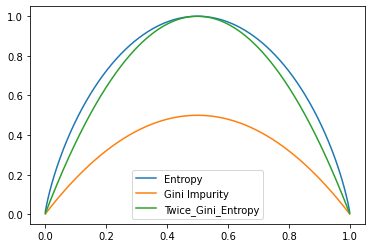

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def get_entropy(p):
    return (-p * np.log2(p) - (1 - p) * np.log2(1 - p))
def get_gini_impurity(p):
    return (1 - (p * p) - (1 - p) ** 2)

en = []
gini_en = []
twice_gini_en = []

x_vals = np.arange(0.001, 1, 0.001)

for p in x_vals:
    en.append(get_entropy(p))
    val = get_gini_impurity(p)
    gini_en.append(val)
    twice_gini_en.append(2 * val)

plt.plot(x_vals, en, label="Entropy")
plt.plot(x_vals, gini_en, label="Gini Impurity")
plt.plot(x_vals, twice_gini_en, label = "Twice_Gini_Entropy")

plt.legend()
plt.show()

### Question 3 Training a Decision Tree  
**[40 points]**

You can download the spam dataset from the link given below. This dataset contains feature vectors and the lables of Spam/Non-Spam mails. 
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

**NOTE: The last column in each row represents whether the mail is spam or non spam**\
Although not needed, incase you want to know what the individual columns in the feature vector means, you can read it in the documentation given below.
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.DOCUMENTATION

**Download the data and load it from the code given below**

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv("./spambase.data", header=None)

data

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


You can try to normalize each column (feature) separately with wither one of the following ideas. **Do not normalize labels**.
- Shift-and-scale normalization: substract the minimum, then divide by new maximum. Now all values are between 0-1
- Zero mean, unit variance : substract the mean, divide by the appropriate value to get variance=1.

In [3]:
vectorized_data = np.array(data)
normalized_data = []

x = (np.shape(vectorized_data))[1] - 1 

for i in range(x):
    col = vectorized_data[:, i]

    min = np.min(col)
    col = col - min

    max = np.max(col)
    col = col / max

    normalized_data.append(col)

X = np.array(normalized_data).T

y = np.array(vectorized_data[:, x])

1. Split your data into train 80% and test dataset 20% 
2. **[BONUS]** Visualize the data using PCA . You can reduce the dimension of the data if you want. Bonus marks if this increases your accuracy.

*NOTE: If you are applying PCA or any other type of dimensionality reduction, do it before splitting the dataset*

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i) # 80% training and 20% test

You need to perform a K fold validation on this and report the average training error over all the k validations. 
- For this , you need to split the training data into k splits.
- For each split, train a decision tree model and report the training , validation and test scores.
- Report the scores in a tabular form for each validation

In [5]:
# Initialize K and split the data
K = 5

split_data   = np.array(np.array_split(X_train, K))
split_labels = np.array(np.array_split(y_train, K))

#Run the K fold Validation and report the scores
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from tabulate import tabulate


list_1 = [True] * K


training_score   = []
validation_score = []
test_score       = []


for i in range(K):
    list_1[i] = False
    train_data = split_data[np.array(list_1), ]
    train_labels = split_labels[np.array(list_1), ]

    validation_data = split_data[i]
    validation_labels = split_labels[i]

    train_data_shape = np.shape(train_data)
    train_data = train_data.reshape(train_data_shape[0] * train_data_shape[1], train_data_shape[2])

    train_labels_shape = np.shape(train_labels)
    train_labels = train_labels.reshape(train_labels_shape[0] * train_labels_shape[1])


    clf = DecisionTreeClassifier()                          ## Creates Decision Tree classifier object
    clf = clf.fit(train_data, train_labels)                 ## Train Decision Tree classifier 
    
    y_pred         = clf.predict(X_train)
    training_score.append(metrics.accuracy_score(y_train, y_pred))

    y_pred           = clf.predict(validation_data)
    validation_score.append(metrics.accuracy_score(validation_labels, y_pred))

    y_pred         = clf.predict(X_test)
    test_score.append(metrics.accuracy_score(y_test, y_pred))

    list_1[i] = True



data = []
data.append(training_score)
data.append(validation_score)
data.append(test_score)

data = np.array(data)
data = list(data.T)

head = ["Training Scores", "Validation Scores", "Test Scores"]

print(tabulate(data, headers=head, tablefmt="grid"))

+-------------------+---------------------+---------------+
|   Training Scores |   Validation Scores |   Test Scores |
+===================+=====================+===============+
|          0.98288  |            0.915761 |      0.901194 |
+-------------------+---------------------+---------------+
|          0.980978 |            0.907609 |      0.914224 |
+-------------------+---------------------+---------------+
|          0.979891 |            0.902174 |      0.912052 |
+-------------------+---------------------+---------------+
|          0.983967 |            0.921196 |      0.910966 |
+-------------------+---------------------+---------------+
|          0.979891 |            0.900815 |      0.899023 |
+-------------------+---------------------+---------------+


### Question 4 Random Forest Algorithm
**[30 points]**

1. What is boosting, bagging and  stacking?
Which class does random forests belong to and why? **[5 points]**

**Boosting**:Boosting considers homogeneous weak learners and learns them sequentially and combines them to get a classifier.</br>
**Bagging:** Bagging considers homogeneous weak learners and learns each of them independently from each other in parallel and combines them to get a classifier.</br>
**stacking**: stacking considers heterogeneous weak learners and learns them in parallel and combines them by training</br> 

Random forests belongs to bagging because we are considering weak learners and creating the decision trees independently


2. Implement random forest algorithm using different decision trees. **[25 points]** 

In [6]:
import random

def generate_random_forest(i):
    X_train_1, X_unwanted, y_train_1, y_unwanted = train_test_split(X_train, y_train, test_size=0.33, random_state=i) # 66.67% training and 33% test

    return X_train_1, y_train_1

def random_forest_algorithm(num_decision_trees, num_of_decision_tree_features):
        
    labels = []
        
    for i in range(num_decision_trees):
        X_train_random_forest, y_train_random_forest = generate_random_forest(i)
           
        feature_indices = random.sample(list(np.arange(0, 57, 1)), num_of_decision_tree_features)
        train_data   = X_train_random_forest[:, feature_indices]
        train_labels = y_train_random_forest  
           
        clf = DecisionTreeClassifier()                          ## Creates Decision Tree classifier object
        clf = clf.fit(train_data, train_labels)                 ## Train Decision Tree classifier 
                                
        y_pred = clf.predict(X_test[:, feature_indices])
                                  
        labels.append(y_pred)       
           
    labels_sum = np.mean(labels, axis=0)

    count=0
    for i in range(len(X_test)):
        if((y_test[i]==1 and labels_sum[i]>=0.5) or (y_test[i]==0 and labels_sum[i]<0.5)):
            count+=1

    accuray = (count/len(X_test)) * 100
             
    return accuray

In [7]:
num_of_trees = 100
num_of_features_in_trees = 57

accuracy = random_forest_algorithm(num_of_trees, num_of_features_in_trees)

print("Random Forest Accuracy: ", accuracy, "%")

Random Forest Accuracy:  94.57111834961998 %
